<a href="https://colab.research.google.com/github/Saifullah785/Agentic_AI_LangGraph_Learning_Journey/blob/main/Sequential_Workflows_in_LangGraph/bmi_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Install langgraph library
%pip install langgraph

In [15]:
# Import necessary libraries for LangGraph
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [16]:
# Define a state dictionary for BMI calculation
class BMIState(TypedDict):

    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [17]:
# Define a function to calculate BMI
def calculate_bmi(state: BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi, 2)

    return state

In [18]:
# Define a function to label BMI category
def label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

In [19]:
# Define, add nodes and edges to the LangGraph
# define your graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)


# compile the graph
workflow = graph.compile()

In [20]:
# Execute the LangGraph workflow
# execute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


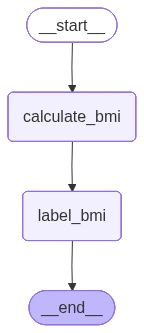

In [21]:
# Display the LangGraph as a Mermaid diagram
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())